In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [3]:
train_data, train_labels

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [4]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

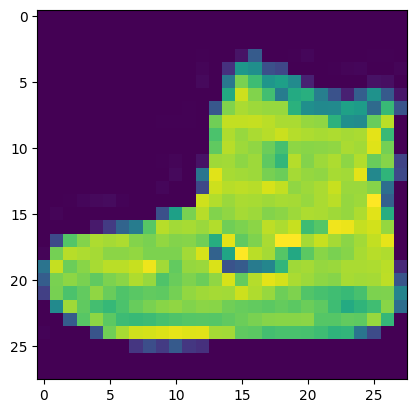

In [5]:
plt.imshow(train_data[0]);

In [6]:
train_labels[0]

9

In [7]:
class_names=['T-shirt/top','Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'sneaker', 'Bag', 'Ankle boot']

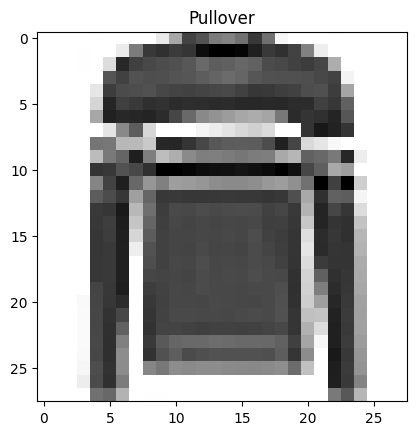

In [8]:
plt.imshow(train_data[5], cmap=plt.cm.binary)
plt.title(class_names[train_labels[5]]);

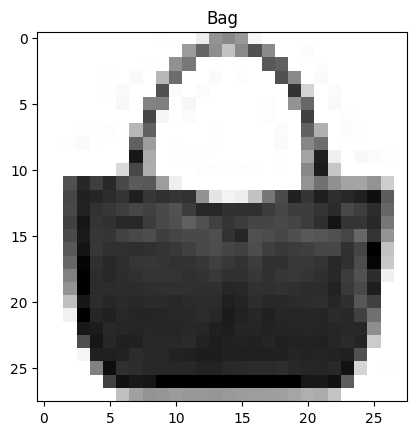

In [9]:
plt.imshow(train_data[100], cmap=plt.cm.binary)
plt.title(class_names[train_labels[100]]);

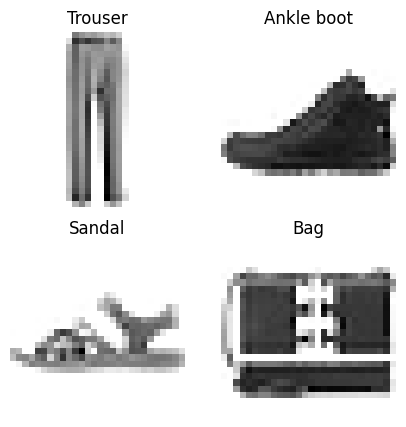

In [10]:
import random
plt.figure(figsize=(5,5))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [11]:
from keras.activations import activation_layers
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data, train_labels, epochs=10,validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 14s 6ms/step - loss: 2.7037 - accuracy: 0.0983 - val_loss: 2.3051 - val_accuracy: 0.1001
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3035 - accuracy: 0.0985 - val_loss: 2.3046 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.2838 - accuracy: 0.1112 - val_loss: 2.1807 - val_accuracy: 0.1553
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8606 - accuracy: 0.2452 - val_loss: 1.7113 - val_accuracy: 0.2731
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6390 - accuracy: 0.3030 - val_loss: 1.5919 - val_accuracy: 0.3273
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5644 - accuracy: 0.3381 - val_loss: 1.5425 - val_accuracy: 0.3515
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5371 - accuracy: 0.3530 - val_loss: 1.5363 - val_accurac

In [12]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [13]:
pd.DataFrame(history_1.history)

,loss,accuracy,val_loss,val_accuracy
0,2.703745,0.098333,2.305063,0.1001
1,2.303455,0.098533,2.304632,0.1000
2,2.283795,0.111217,2.180707,0.1553
3,1.860643,0.245200,1.711343,0.2731
4,1.639036,0.302983,1.591906,0.3273
5,1.564365,0.338050,1.542451,0.3515
6,1.537073,0.352983,1.536272,0.3468
7,1.511766,0.356567,1.518880,0.3551
8,1.504639,0.359883,1.521631,0.3543
9,1.496107,0.361967,1.501070,0.3660


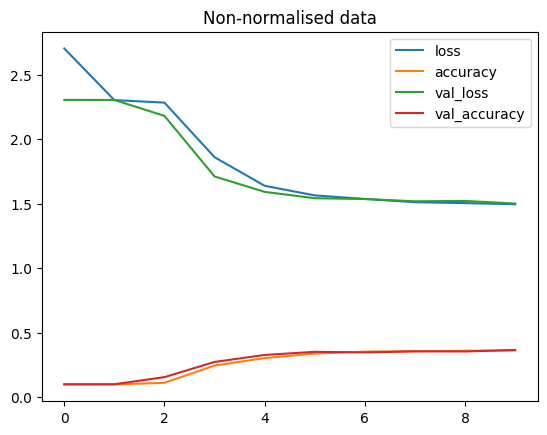

In [14]:
pd.DataFrame(history_1.history).plot(title="Non-normalised data");

### Improving by normalising the data
Neural network likes the data to be scaled or normalised

In [15]:
train_data.min(), train_data.max()

(0, 255)

In [16]:
train_data = train_data/255
test_data = test_data/255

In [17]:
train_data.min(), train_data.max()

(0.0, 1.0)

In [18]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data, train_labels, epochs=20,validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4233 - accuracy: 0.4633 - val_loss: 1.0106 - val_accuracy: 0.6289
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8793 - accuracy: 0.6587 - val_loss: 0.8272 - val_accuracy: 0.6710
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7615 - accuracy: 0.6958 - val_loss: 0.7475 - val_accuracy: 0.7129
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6999 - accuracy: 0.7313 - val_loss: 0.7064 - val_accuracy: 0.7317
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6633 - accuracy: 0.7544 - val_loss: 0.6819 - val_accuracy: 0.7625
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6276 - accuracy: 0.7808 - val_loss: 0.6494 - val_accuracy: 0.7765
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6111 - accuracy: 0.7865 - val_loss: 0.6599 - val_accuracy:

In [19]:
pd.DataFrame(history_2.history)

,loss,accuracy,val_loss,val_accuracy
0,1.423262,0.463317,1.010650,0.6289
1,0.879349,0.658700,0.827150,0.6710
2,0.761481,0.695800,0.747463,0.7129
3,0.699911,0.731317,0.706372,0.7317
4,0.663334,0.754417,0.681917,0.7625
5,0.627600,0.780767,0.649384,0.7765
6,0.611119,0.786450,0.659929,0.7703
7,0.598611,0.789500,0.623781,0.7841
8,0.590121,0.793033,0.616899,0.7890
9,0.584944,0.795633,0.611084,0.7905


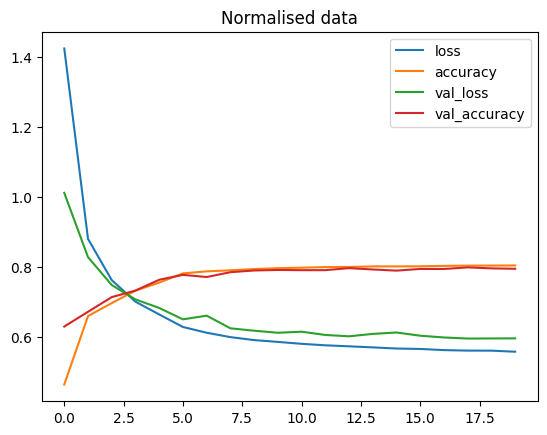

In [20]:
pd.DataFrame(history_2.history).plot(title='Normalised data');

### Find the ideal learning rate

In [21]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

history_3 = model_3.fit(train_data,
                        train_labels,
                        epochs=40,
                        validation_data=(test_data, test_labels),
                        callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0039 - accuracy: 0.6349 - val_loss: 0.7330 - val_accuracy: 0.7298 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6600 - accuracy: 0.7613 - val_loss: 0.6482 - val_accuracy: 0.7661 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6070 - accuracy: 0.7876 - val_loss: 0.6415 - val_accuracy: 0.7791 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5785 - accuracy: 0.7990 - val_loss: 0.5993 - val_accuracy: 0.7951 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5612 - accuracy: 0.8036 - val_loss: 0.6049 - val_accuracy: 0.7900 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5487 - accuracy: 0.8081 - val_loss: 0.6277 - val_accuracy: 0.7826 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

In [22]:
pd.DataFrame(history_3.history)

,loss,accuracy,val_loss,val_accuracy,lr
0,1.003862,0.634933,0.733018,0.7298,0.001000
1,0.659990,0.761333,0.648224,0.7661,0.001122
2,0.606978,0.787567,0.641499,0.7791,0.001259
3,0.578548,0.798950,0.599348,0.7951,0.001413
4,0.561203,0.803583,0.604904,0.7900,0.001585
5,0.548695,0.808150,0.627667,0.7826,0.001778
6,0.542994,0.809967,0.580795,0.7976,0.001995
7,0.535734,0.812083,0.561949,0.8039,0.002239
8,0.531962,0.813217,0.572392,0.8058,0.002512
9,0.528763,0.814517,0.572260,0.7998,0.002818


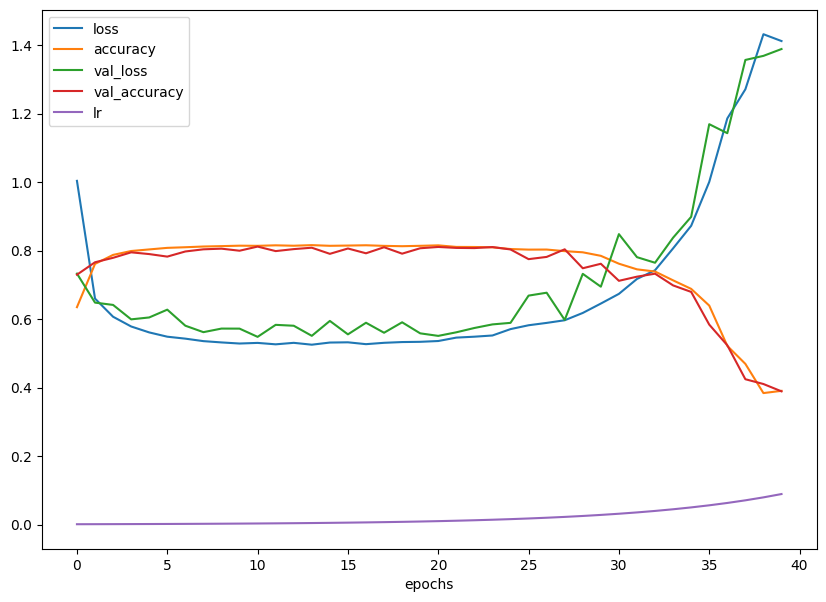

In [23]:
pd.DataFrame(history_3.history).plot(figsize=(10,7), xlabel="epochs");

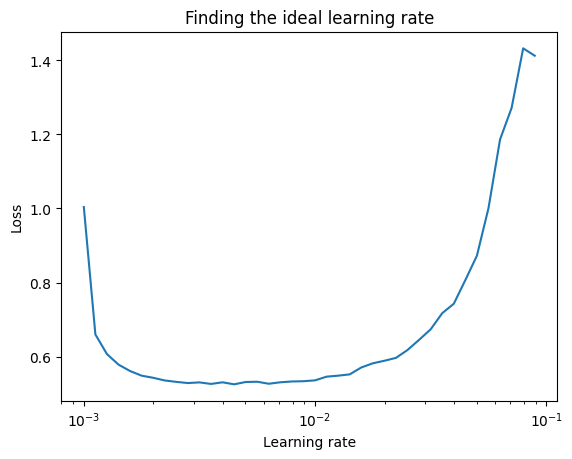

In [24]:
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, history_3.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [32]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_4 = model_4.fit(train_data,
                        train_labels,
                        epochs=20,
                        validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 0.8955 - accuracy: 0.6258 - val_loss: 0.7835 - val_accuracy: 0.7099
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6844 - accuracy: 0.7510 - val_loss: 0.7084 - val_accuracy: 0.7429
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6242 - accuracy: 0.7786 - val_loss: 0.6267 - val_accuracy: 0.7685
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5940 - accuracy: 0.7904 - val_loss: 0.6324 - val_accuracy: 0.7782
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5832 - accuracy: 0.7953 - val_loss: 0.5965 - val_accuracy: 0.7898
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5768 - accuracy: 0.7982 - val_loss: 0.6105 - val_accuracy: 0.7850
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5727 - accuracy: 0.7986 - val_loss: 0.5773 - val_accurac

In [33]:
y_probs = model_4.predict(test_data)

313/313 [==============================] - 0s 1ms/step


In [34]:
y_preds = y_probs.argmax(axis=1)

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[778,   0,  25,  49,   2,   1, 121,   0,  24,   0],
       [  3, 929,  14,  44,   6,   0,   2,   0,   2,   0],
       [ 14,   0, 595,  10, 224,   0, 148,   0,   9,   0],
       [ 60,   6,  20, 798,  45,   3,  54,   0,  14,   0],
       [  0,   0,  77,  21, 768,   0, 126,   0,   8,   0],
       [  0,   0,   0,   2,   1, 907,   0,  41,  18,  31],
       [178,   0,  69,  29, 137,   0, 542,   0,  45,   0],
       [  0,   0,   0,   0,   0,  38,   0, 936,   2,  24],
       [  0,   0,   1,   8,   5,   5,  44,  13, 922,   2],
       [  0,   0,   0,   2,   0,  24,   0,  76,   1, 897]])

In [36]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 3140      
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [37]:
import itertools
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

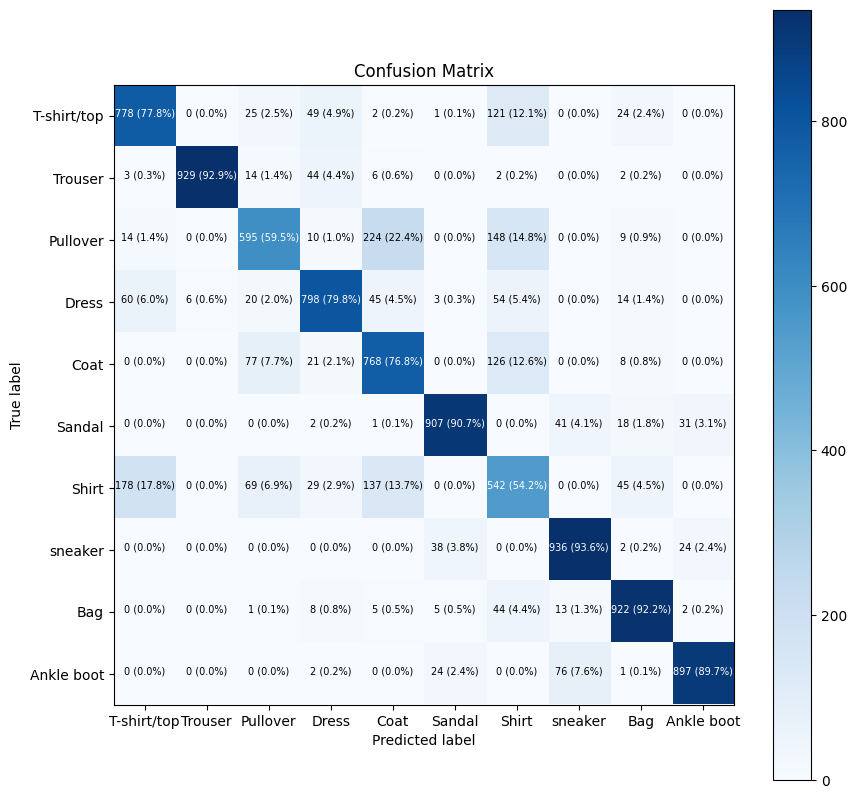

In [38]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(10, 10),
                      text_size=7)
